# The demonstration of the tropical precipitation module for ICON data

## Structure


1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Calculation of histogram of precipitation/tropical precipitation](#2-calculation-of-histogram-of-precipitationtropicalprecipitation)

    2.1. [with manual data preprocessing](#21-diagnostic-with-manual-data-preprocessing)

    2.2 [automatic data preprocessing](#22-diagnostic-with-automatic-data-preprocessing)

    2.3. [with non uniform binning](#23-histogram-with-not-uniform-binning)
    
    2.4. [with weights](#24-histogram-with-weights)

3. [Dataset creator](#3-dataset-creator)
 
4. [Histograms of tropical precipitation](#4-histograms-of-tropical-precipitationn)

    4.1. [Plot of mean and median value of precipitation rate](#41-plot-of-mean-and-median-value-of-precipitation-rate)

[Go to the end of file](#the-end)

#

## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import   graphic_creator, time_functions #functions_for_xarrays,
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

#### ICON data

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09",  regrid="r100")
icon = reader.retrieve(regrid=True) 

In [3]:
icon

<xarray.Dataset>
Dimensions:   (time: 37009, lat: 180, lon: 360)
Coordinates:
  * time      (time) datetime64[ns] 2020-01-20 ... 2022-03-01
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables: (12/33)
    cfh_lnd   (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    tciw      (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    tclw      (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    cptgzvi   (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    mslhfl    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    msshfl    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    ...        ...
    10u       (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    10v       (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    msntrf    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    mtntrf    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    msnsrf    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    mtnsrf    (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-10 23:29:47 retrie...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

## 2. Calculation of histogram of precipitation/tropicalprecipitation


### 2.1. Diagnostic with manual data preprocessing

#### Initializing the class object and setting the class attributes

In [3]:
diag = TR_PR_Diag(num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

#### Selecting the time range

In [4]:
icon.time[47*2]

<xarray.DataArray 'time' ()>
array('2020-01-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-01-21T23:00:00
Attributes:
    axis:           T
    standard_name:  time

In [4]:
icon_chunk = icon["tprate"][0:47,:] 

#### Selecting the tropical latitudes

#Select the latitudes ...ot latitude band! `Think

#### Fastest histogram

In [9]:
hist_icon_trop  = diag.histogram(icon_chunk,  preprocess = False)
hist_icon_trop

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.814e+06 9.122e+04 ... 836.0 668.0
    trop_frequency  (left_edge) float64 0.9257 0.03001 ... 0.000275 0.0002197
    trop_pdf        (left_edge) float64 1.389e+07 4.501e+05 ... 3.296e+03
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [6]:
diag.histogram(icon_chunk,  preprocess = False, create_xarray=True)

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.814e+06 9.122e+04 ... 836.0 668.0
    trop_frequency  (left_edge) float64 0.9257 0.03001 ... 0.000275 0.0002197
    trop_pdf        (left_edge) float64 1.389e+07 4.501e+05 ... 3.296e+03
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [7]:
diag.histogram(icon_chunk,  preprocess = False, path_to_save='new_dataset.pickle')

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.814e+06 9.122e+04 ... 836.0 668.0
    trop_frequency  (left_edge) float64 0.9257 0.03001 ... 0.000275 0.0002197
    trop_pdf        (left_edge) float64 1.389e+07 4.501e+05 ... 3.296e+03
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [8]:
diag.load_histogram(path_to_dataset='new_dataset.pickle')

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.814e+06 9.122e+04 ... 836.0 668.0
    trop_frequency  (left_edge) float64 0.9257 0.03001 ... 0.000275 0.0002197
    trop_pdf        (left_edge) float64 1.389e+07 4.501e+05 ... 3.296e+03
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

### 2.2. Diagnostic with automatic data preprocessing

In [10]:
diag = TR_PR_Diag( trop_lat=30,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15, s_time=10, f_time=11)

In [11]:
hist_icon_prepr  = diag.histogram(icon)
hist_icon_prepr 

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 6.522e+03 220.0 95.0 ... 0.0 1.0 2.0
    trop_frequency  (left_edge) float64 0.9084 0.03064 ... 0.0001393 0.0002786
    trop_pdf        (left_edge) float64 1.363e+07 4.596e+05 ... 4.178e+03
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-11 01:55:04 retrie...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

### 2.3. Histogram with not uniform binning

In [12]:
#bins = np.logspace(-9, -6, 15)
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
       7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
       5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
       3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [13]:
diag = TR_PR_Diag(bins = bins, s_time = 10, f_time = 20)

In [14]:
hist_icon_trop_logspaced  = diag.histogram(icon)
hist_icon_trop_logspaced

<xarray.Dataset>
Dimensions:         (left_edge: 14)
Coordinates:
  * left_edge       (left_edge) float64 1e-09 1.638e-09 ... 3.728e-07 6.105e-07
    width           (left_edge) float64 6.379e-10 1.045e-09 ... 3.895e-07
Data variables:
    trop_counts     (left_edge) int64 1572 1592 1666 1713 ... 2097 1825 1470 875
    trop_frequency  (left_edge) float64 0.06317 0.06397 ... 0.05907 0.03516
    trop_pdf        (left_edge) float64 9.902e+07 6.123e+07 ... 9.028e+04
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-11 01:55:04 retrie...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

In [15]:
hist_icon_trop_logspaced  = diag.histogram(icon_chunk)
hist_icon_trop_logspaced

<xarray.Dataset>
Dimensions:         (left_edge: 14)
Coordinates:
  * left_edge       (left_edge) float64 1e-09 1.638e-09 ... 3.728e-07 6.105e-07
    width           (left_edge) float64 6.379e-10 1.045e-09 ... 3.895e-07
Data variables:
    trop_counts     (left_edge) int64 1572 1592 1666 1713 ... 2097 1825 1470 875
    trop_frequency  (left_edge) float64 0.06317 0.06397 ... 0.05907 0.03516
    trop_pdf        (left_edge) float64 9.902e+07 6.123e+07 ... 9.028e+04
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

### 2.4. Histogram with weights

In [16]:
diag = TR_PR_Diag(bins = bins, s_time = 10, f_time = 20)

In [17]:
diag = TR_PR_Diag( trop_lat=30,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15, s_time=10, f_time=11)

#### For bins calculations are in 5 times slower then for left_edges and number of bins!

In [18]:
hist_icon_trop_weighted_np  = diag.histogram(icon_chunk, weights=reader.grid_area)
hist_icon_trop_weighted_np

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 8.023e+13 2.707e+12 ... 2.459e+10
    trop_frequency  (left_edge) float64 0.9084 0.03065 ... 0.0001388 0.0002783
    trop_pdf        (left_edge) float64 1.363e+07 4.598e+05 ... 4.175e+03
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

## 3. Dataset creator

##### Creating the Dataset with global attributes

##### Adding the Frequency DataArray

#

## 4. Histograms of tropical precipitation

##### Histogram of counts (`frequency=False, pdf = False`) + smooth linestyle (`smooth = True`)

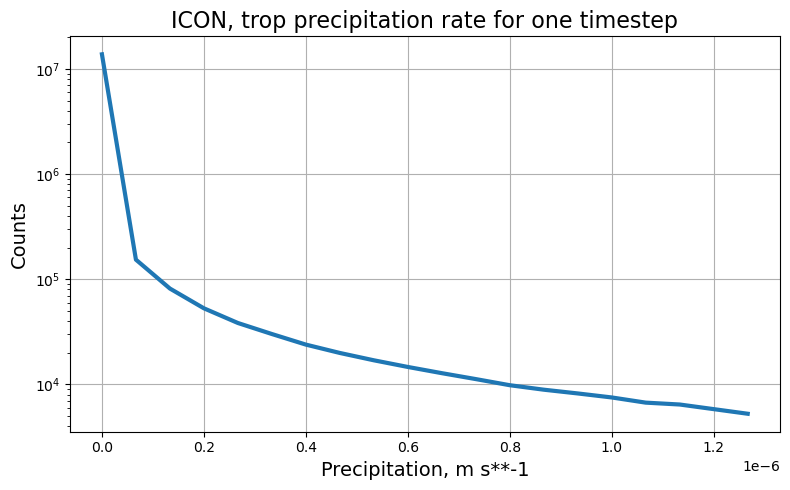

In [17]:
diag.hist_plot(hist_icon_trop, frequency=False, pdf = False, smooth = True, step = False, viridis = False,
               xlogscale = False, label='ICON/ICON_trop', plot_title = "ICON, trop precipitation rate for one timestep")

##### Histogram of frequency (`frequency=True`) + step linestyle (`step = True`)

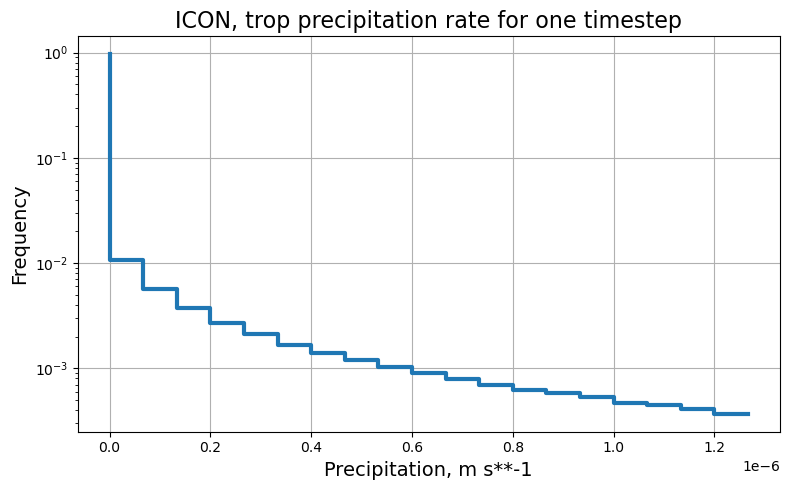

In [19]:
diag.hist_plot(hist_icon_trop, frequency=True, pdf = False, smooth = False, step = True, viridis = False,
               xlogscale = False, label='ICON/ICON_trop', plot_title = "ICON, trop precipitation rate for one timestep")

##### Histogram of PDF  (`pdf=True`) + viridis style (`smooth = False, step = False`)

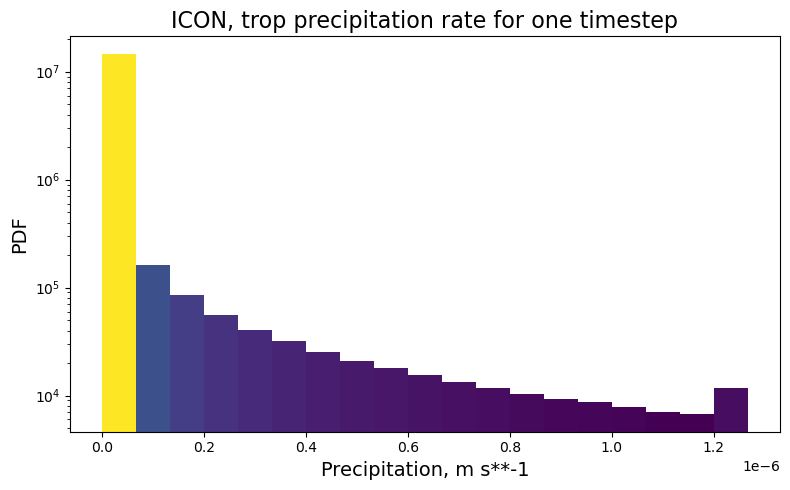

In [21]:
diag.hist_plot(hist_icon_trop, frequency=False, pdf = True, smooth = False, step = False, viridis = True,
               xlogscale = False, label='ICON/ICON_trop', plot_title = "ICON, trop precipitation rate for one timestep")

##### Default arguments of plot function

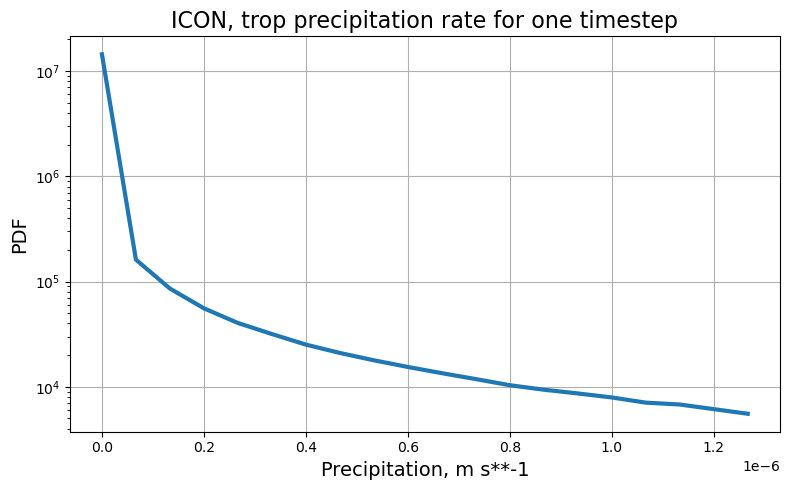

In [26]:
diag.hist_plot(hist_icon_trop, weights=None, frequency = False, pdf = True, smooth = True, step = False, viridis = False, 
               ls = '-', xlogscale = False, color = 'tab:blue', save = True, 
               label='ICON/ICON_trop', plot_title = "ICON, trop precipitation rate for one timestep")


### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

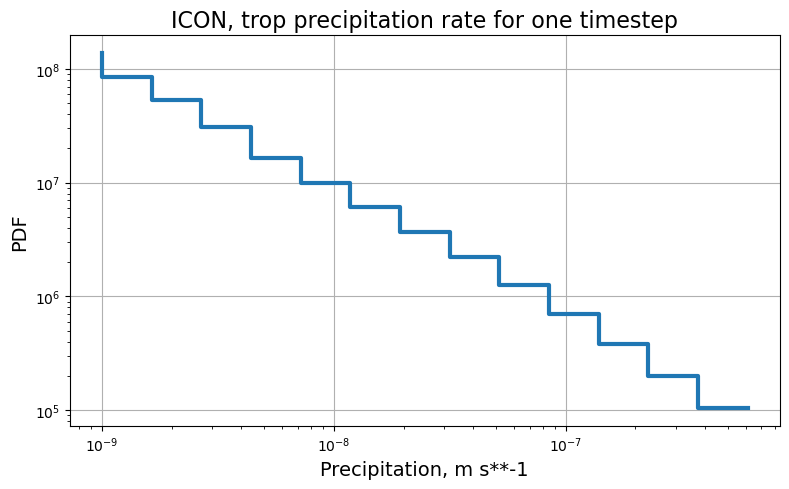

In [27]:
diag.hist_plot(hist_icon_trop_logspaced, frequency = False, pdf = True, step=True, smooth = False, xlogscale=True, \
                label='ICON/ICON_trop_log', plot_title = "ICON, trop precipitation rate for one timestep")

##### Weighted values of precipitation

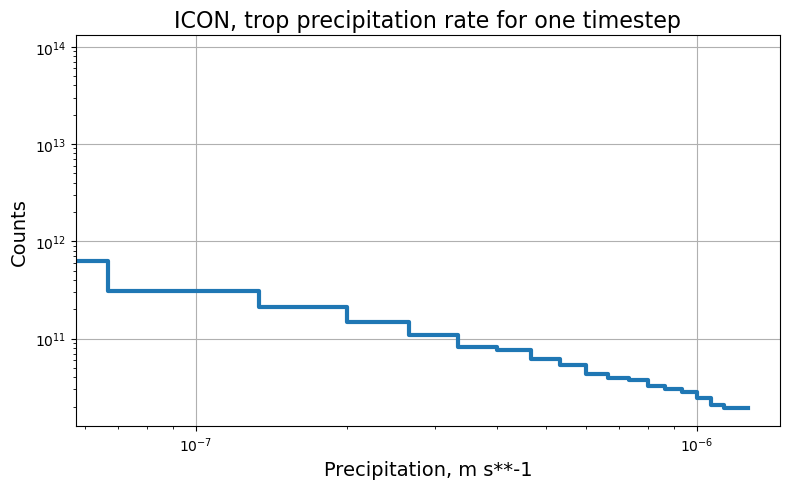

In [28]:
diag.hist_plot(hist_icon_trop_weighted, frequency = False, pdf = False, step=True, smooth = False, xlogscale=True, \
                label='ICON/ICON_trop_log', plot_title = "ICON, trop precipitation rate for one timestep")

### 4.1. Plot of mean and median value of precipitation rate

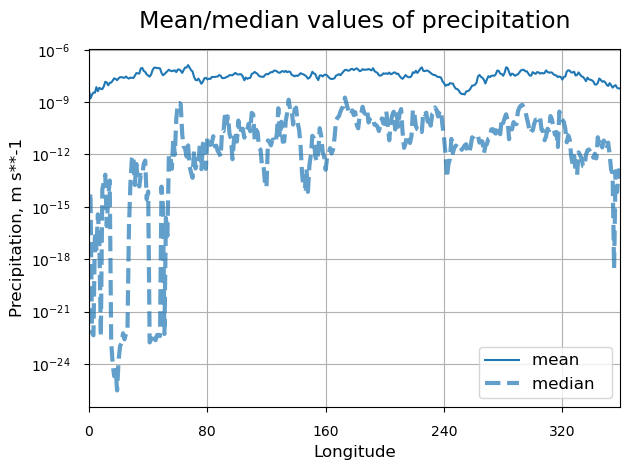

In [6]:
diag.mean_and_median_plot(icon_chunk, coord ='lon', log=True, trop_lat=30, savelabel = 'ICON/ICON', highlight_seasons=False)

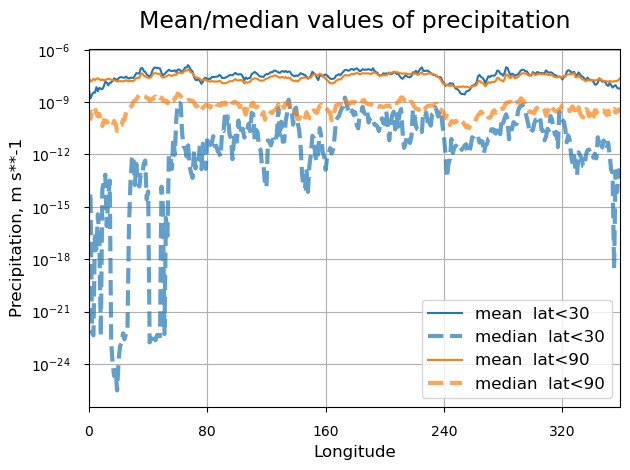

In [7]:
add = diag.mean_and_median_plot(icon_chunk, coord ='lon', trop_lat=30, legend=' lat<30', savelabel = 'ICON/ICON',  color='tab:blue',  highlight_seasons=False)
diag.mean_and_median_plot(icon_chunk, coord ='lon', trop_lat=90, legend=' lat<90',  add=add, savelabel = 'ICON/ICON', color='tab:orange', highlight_seasons=False)

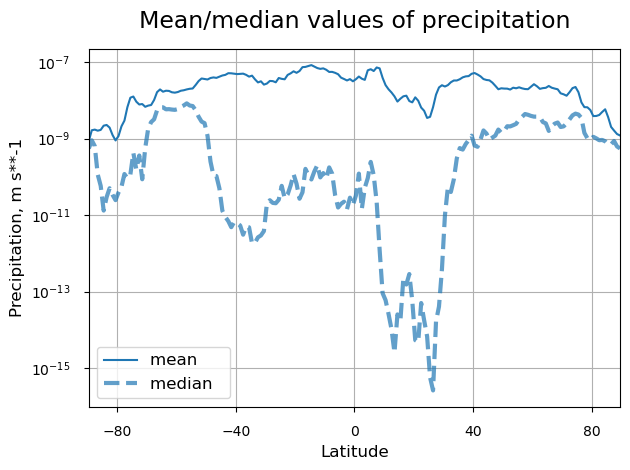

In [8]:
diag.mean_and_median_plot(icon_chunk, coord ='lat', trop_lat=90, savelabel = 'ICON/ICON',   highlight_seasons=False)

In [19]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", freq='monthly', regrid="r010")
icon = reader.retrieve(regrid=True,  timmean=True) 

In [20]:
icon_chunk = icon["tprate"][0:12,:] 

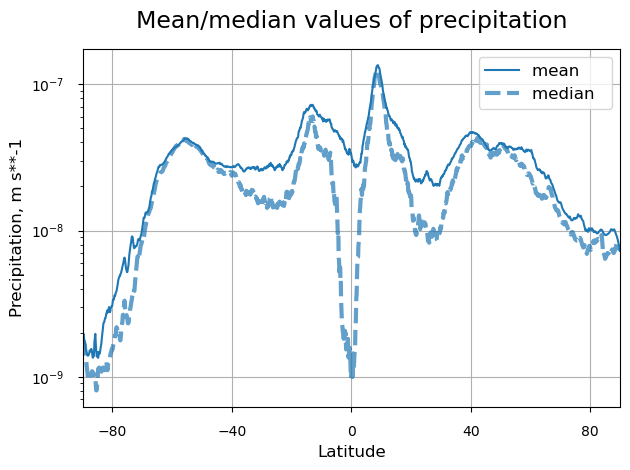

In [21]:
diag.mean_and_median_plot(icon_chunk, coord ='lat', trop_lat=90, savelabel = 'ICON/ICON',   highlight_seasons=False)

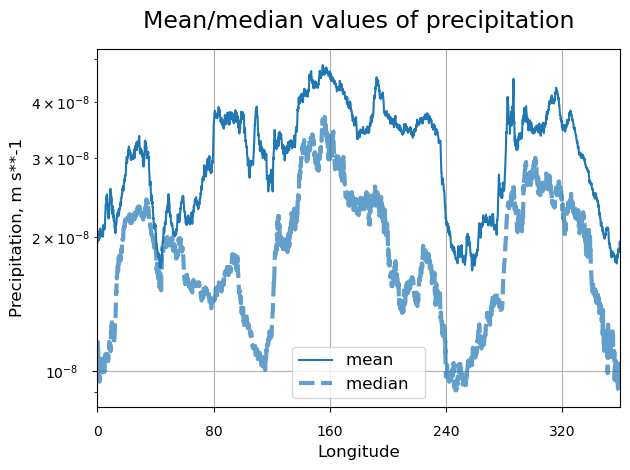

In [23]:
diag.mean_and_median_plot(icon_chunk, coord ='lon', trop_lat=90, savelabel = 'ICON/ICON',   highlight_seasons=False)

In [ ]:
#diag.mean_and_median_plot(icon_chunk, coord ='time', trop_lat=90, savelabel = 'ICON/ICON',   highlight_seasons=False)
#UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype(' None

### Add biase and posibility to sel the data in the function for the speed 

In [ ]:
#ds, ds2, = diag.twins_discrepancy(data=icon, model='era5', space_grid_factor=-10, trop_lat=90)

Done!


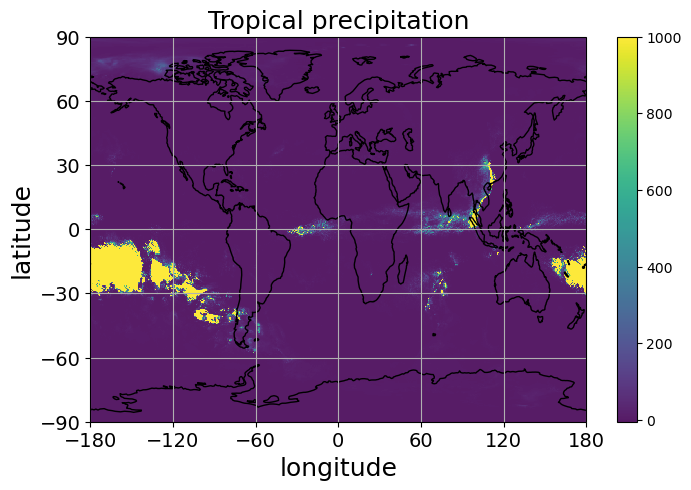

In [31]:
#graphic_creator.image_creator(new_ratio, vmin=-5, vmax=1000, log=False, trop_lat=90) #

[Back to the top of file](#structure)

#

##### The end